In [1]:
# Імпортуемо бібліотека з нейронную мережею та дані для навчання
import tensorflow.keras as keras
import tensorflow as tf
import numpy as np
from keras.backend import tensorflow_backend

print("TensorFlow verison: ", tf.VERSION)
print("Keras version: ", tf.keras.__version__)
print("Channels dimension of image: ", tf.keras.backend.image_data_format())
config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))
session = tf.Session(config=config)
tensorflow_backend.set_session(session)

Using TensorFlow backend.


TensorFlow verison:  1.13.1
Keras version:  2.2.4-tf
Channels dimension of image:  channels_last


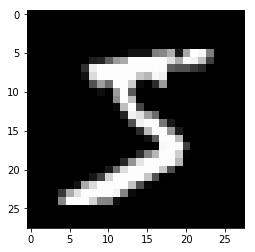

In [2]:
# Завантаження данних, та розподілення на тренувальну і навчальну вибірки. За приклад взяті дані рукописних цифр
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Створення графіка
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap="gray")
plt.show()

In [3]:
X_test_img = x_test

In [4]:
# Для отримання більш точної моделі, треба змаштабувати дані. Метод нормалізації.
# Приймає зачення від 0 до 1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [5]:
x_valid, x_train = x_train[:10000], x_train[10000:]
y_valid, y_train = y_train[:10000], y_train[10000:]

In [6]:
# Будуємо модель нейронної мережи послідовно
model = tf.keras.models.Sequential()
# Так як масив є баговимірним 28х28, то треба його сплюснути до 1х784
# Це буде вхідним шаром мережи
model.add(tf.keras.layers.Flatten())
# Додаємо 2 шари прихованих мереж для розрахунку
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
# Шар вихідних даних, їх 10, бо від 0 до 9
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
# "Компілюємо" модель, вибираємо метрики
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10, 
                                           verbose=1, restore_best_weights=True)

# Будеємо модель, 3 цикли
model.fit(x_train, y_train, epochs=1000, 
          callbacks=[early_stop], 
          validation_data=[x_valid, y_valid], 
          verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Train on 50000 samples, validate on 10000 samples
Epoch 1/1000
50000/50000 [==============================] - 6s 117us/sample - loss: 0.2356 - acc: 0.9298 - val_loss: 0.1186 - val_acc: 0.9659
Epoch 2/1000
50000/50000 [==============================] - 5s 104us/sample - loss: 0.0924 - acc: 0.9711 - val_loss: 0.0994 - val_acc: 0.9707
Epoch 3/1000
50000/50000 [==============================] - 5s 107us/sample - loss: 0.0612 - acc: 0.9801 - val_loss: 0.0894 - val_acc: 0.9737
Epoch 4/1000
50000/50000 [==============================] - 5s 105us/sample - loss: 0.0437 - acc: 0.9853 - val_loss: 0.1086 - val_acc: 0.9696
Epoch 5/1000
50000/50000 [==============================] - 5s 108us/sample - loss: 0.0330 - acc: 0.9891 - val_loss: 0.0938 - val_acc: 0.9753
Epoch 6/1000
50000/50000 [==============================] - 6s 118us/sample - loss: 0.0263 - acc: 0.9911 - val_loss: 0.1104 - val_acc: 0.9714
Epoch 7/1000
50000/50000 [

In [7]:
loss, acc = model.evaluate(x_test, y_test)
print("Втрати = {}".format(loss))
print("Точність = {:.2f}%".format(acc * 100))

10000/10000 [==============================] - 0s 45us/sample - loss: 0.0883 - acc: 0.9732
Втрати = 0.08828407628680579
Точність = 97.32%


In [8]:
# Прогнузування значень
predictions = model.predict(x_test)

1


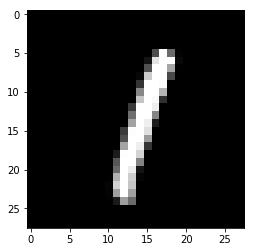

In [9]:
print(np.argmax(predictions[5]))
plt.imshow(X_test_img[5],cmap="gray")
plt.show()

In [10]:
def one_hot_decode(encoded_seq):
    return [np.argmax(vector) for vector in encoded_seq]

preds = np.array(one_hot_decode(predictions))

print(preds.shape)
print(y_test.shape)

(10000,)
(10000,)


In [11]:
correct = np.where(preds==y_test)[0]
incorrect = np.where(preds!=y_test)[0]

print("Correct: {}".format(correct.shape))
print("Incorrect: {}".format(incorrect.shape))


Correct: (9732,)
Incorrect: (268,)


In [12]:
from numpy.random import permutation

# К-сть картинок для зображення
n_view = incorrect.shape[0]

# Отримання випадкового вибору з правильно-прогнозованих картинок
idx = permutation(correct)[:n_view]
idx_incorrect = permutation(incorrect)[:n_view]

# Створення масиву випадкових результатів
preds_correct = preds[idx]
preds_incorrect = preds[idx_incorrect]

imgs = X_test_img[idx]
imgs_incorrect = X_test_img[idx_incorrect]

imgs.shape

(268, 28, 28)

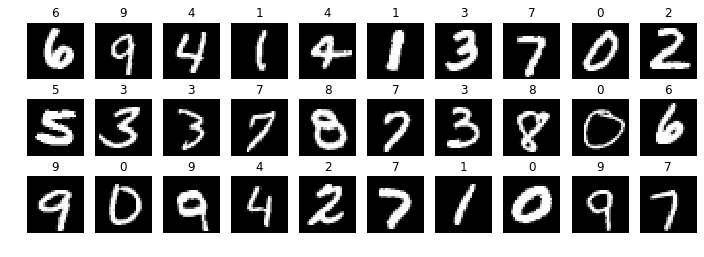

In [13]:
# Зображення перших 30 картинок рупоисних літер
f = plt.figure(figsize=(12,4))

for i in range(30):
    sp = f.add_subplot(3, 10, i+1)
    sp.axis('Off')
    sp.set_title(preds_correct[i])
    img = imgs[i].astype('float32')
    plt.imshow(img, cmap='gray')